# Installing libraries

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import nltk
import re

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Importing Dataset

In [122]:
data=pd.read_csv("C:\\Users\\HP\\datasets\\spam.csv",encoding='latin-1')
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [123]:
#DROPPING UNUSEFUL COLUMNS
data=data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [124]:
#RENAMING THE COLUMN NAMES WITH SOME RELEVANT NAMES
data.rename(columns={"v1":"result","v2":"messege"},inplace=True)
data

,result,messege
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [125]:
#LABELLING THE CONTENTS OF THE 'RESULT' COLUMN INTO NUMERIC VALUE
le_result=LabelEncoder()
data['result']=le_result.fit_transform(data['result'])
data

,result,messege
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


# Preprocessing Messege

In [126]:
data['messege'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [127]:
#PREPARING WORD VECTOR CORPUS
corpus=[]

In [128]:
#USING PORTER STEMMER
ps=PorterStemmer()

In [129]:
#APPLYING REGULAR EXPRESSION
for i in range(0, 5572):

    msg = data['messege'][i]
    #REPLACE EMAIL ADDRESSES WITH 'emailaddr'
    msg = re.sub('\b[\w\-.]+?@\w+?\.\w{2,4}\b', 'emailaddr', data['messege'][i])
    #REPLACE URLs WITH 'httpaddr'
    msg = re.sub('(http[s]?\S+)|(\w+\.[A-Za-z]{2,4}\S*)', 'httpaddr', data['messege'][i])
    #REPLACE MONEY SYMBOLS WITH 'moneysymb'
    msg = re.sub('([A-Z]{3}|[A-Z]?[\$€¥])?\s?(\d{1,3}((,\d{1,3})+)?(.\d{1,3})?(.\d{1,3})?(,\d{1,3})?)', 'moneysymb', data['messege'][i])
    #REPLACE PHONE NUMBERS WITH 'phonenumbr'
    msg = re.sub('\b(\+\d{1,2}\s)?\d?[\-(.]?\d{3}\)?[\s.-]?\d{3}[\s.-]?\d{4}\b', 'phonenumbr', data['messege'][i])
    #REPLACE NUMBERS WITH 'numbr'
    msg = re.sub('\d+(\.\d+)?', 'numbr', data['messege'][i])
    
    #REMOVE ALL PUNCTUATIONS
    msg = re.sub('[^\w\d\s]', ' ', data['messege'][i])
    
    if i<1:
        print("\t\t\t\t MESSAGE ", i)
    
    if i<1:
        print("\n After Regular Expression - Message ", i, " : ", msg)
    
    # EACH WORD TO LOWER CASE
    msg = msg.lower()    
    if i<1:
        print("\n Lower case Message ", i, " : ", msg)
    
    # SPLITTING WORDS INTO TOKENS
    msg = msg.split()    
    if i<1:
        print("\n After Splitting - Message ", i, " : ", msg)
    
    # STEMMING WITH PorterStemmer HANDLING Stop Words
    msg = [ps.stem(word) for word in msg if not word in set(stopwords.words('english'))]
    if i<1:
        print("\n After Stemming - Message ", i, " : ", msg)
    
    # PREPARING MESSAGES WITH REMAINING TOKENS
    msg = ' '.join(msg)
    if i<1:
        print("\n Final Prepared - Message ", i, " : ", msg, "\n\n")
    
    # PREPARING WordVector Corpus
    corpus.append(msg)

				 MESSAGE  0

 After Regular Expression - Message  0  :  Go until jurong point  crazy   Available only in bugis n great world la e buffet    Cine there got amore wat   

 Lower case Message  0  :  go until jurong point  crazy   available only in bugis n great world la e buffet    cine there got amore wat   

 After Splitting - Message  0  :  ['go', 'until', 'jurong', 'point', 'crazy', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'there', 'got', 'amore', 'wat']

 After Stemming - Message  0  :  ['go', 'jurong', 'point', 'crazi', 'avail', 'bugi', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amor', 'wat']

 Final Prepared - Message  0  :  go jurong point crazi avail bugi n great world la e buffet cine got amor wat 




# Preparing vectors for each messege

In [130]:
cv=CountVectorizer()
cv

CountVectorizer()

In [131]:
data_input=cv.fit_transform(corpus).toarray()

In [132]:
data_input[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# Applying classifier

In [85]:
data_output=data['result']
data_output

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: result, Length: 5572, dtype: int32

# Splitting the data into train and test data

In [133]:
xtrain,xtest,ytrain,ytest=train_test_split(data_input,data_output,test_size=0.2)

In [134]:
len(xtrain)

4457

In [135]:
len(xtest)

1115

# Applying Guassian Naive Bayes

In [136]:
bayes_classifier = GaussianNB()
bayes_classifier.fit(xtrain, ytrain)

GaussianNB()

In [143]:
ypred = bayes_classifier.predict(xtest)

In [144]:
#Evaluating
cm = confusion_matrix(ytest, ypred)
print(cm)

[[831 123]
 [ 15 146]]


Text(33.0, 0.5, 'truth')

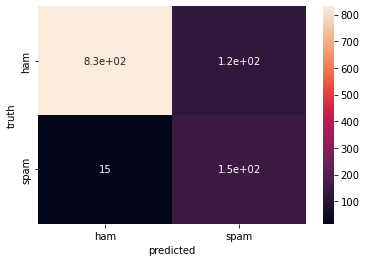

In [145]:
sn.heatmap(cm,annot=True,xticklabels=['ham','spam'],yticklabels=['ham','spam'])
plt.xlabel('predicted')
plt.ylabel('truth')

In [146]:
bayes_classifier.score(xtest,ytest)

0.8762331838565023

# Applying Decision Tree

In [147]:
decisiontree_classifier=DecisionTreeClassifier()
decisiontree_classifier.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [148]:
ypred=decisiontree_classifier.predict(xtest)

In [149]:
#Evaluating
cm = confusion_matrix(ytest, ypred)
print(cm)

[[944  10]
 [ 26 135]]


Text(33.0, 0.5, 'truth')

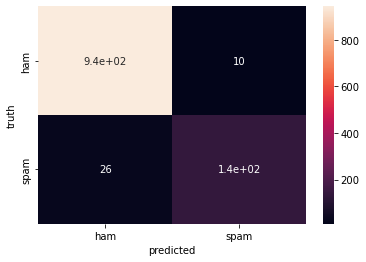

In [152]:
sn.heatmap(cm,annot=True,xticklabels=['ham','spam'],yticklabels=['ham','spam'])
plt.xlabel('predicted')
plt.ylabel('truth')

In [153]:
model.score(xtest,ytest)

0.9955156950672646

# Applying Random Forest

In [154]:
randomforest_classifier=RandomForestClassifier()
randomforest_classifier.fit(xtrain,ytrain)

RandomForestClassifier()

In [155]:
ypred=randomforest_classifier.predict(xtest)

In [156]:
#Evaluating
cm = confusion_matrix(ytest, ypred)
print(cm)

[[950   4]
 [ 32 129]]


Text(33.0, 0.5, 'truth')

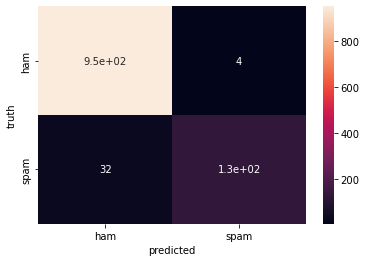

In [157]:
sn.heatmap(cm,annot=True,xticklabels=['ham','spam'],yticklabels=['ham','spam'])
plt.xlabel('predicted')
plt.ylabel('truth')

In [158]:
model.score(xtest,ytest)

0.9955156950672646

# Final Accuracy
    Guassian NB : 87.62%
    Decision Tree : 99.55%
    Random Forest : 99.55%